In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlencode,quote
import urllib.request
import json

In [3]:
#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [7]:
seoul_vc = pd.read_csv('./result/finaly_data_서울시.csv')
busan_vc = pd.read_csv('./result/finaly_data_부산시.csv')

In [8]:
seoul_vc.head()
busan_vc.head()

,Unnamed: 0,지역,매출액,관객수,주,1차접종누계,2차접종누계
0,0,서울시,3361656490,368804,2020-08-16,NaN,NaN
1,1,서울시,2189550260,247399,2020-08-23,NaN,NaN
2,2,서울시,1842116650,200100,2020-08-30,NaN,NaN
3,3,서울시,1733144880,188395,2020-09-06,NaN,NaN
4,4,서울시,1571785690,172993,2020-09-13,NaN,NaN


,Unnamed: 0,지역,매출액,관객수,주,1차접종누계,2차접종누계
0,0,부산시,1114537230,123943,2020-08-16,NaN,NaN
1,1,부산시,618924290,71890,2020-08-23,NaN,NaN
2,2,부산시,467448880,53630,2020-08-30,NaN,NaN
3,3,부산시,401747560,45878,2020-09-06,NaN,NaN
4,4,부산시,350543860,40374,2020-09-13,NaN,NaN


## 서울 데이터 시각화 - 1차 2차 백신 누적 접종 현황과 영화관 매출액

<ipython-input-47-8ae0d0c4e16d>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig1.set_xticklabels(fig1.get_xticklabels(), rotation=-55, fontsize='small')


[Text(0, 0, '2020-08-16'),
 Text(1, 0, '2020-08-23'),
 Text(2, 0, '2020-08-30'),
 Text(3, 0, '2020-09-06'),
 Text(4, 0, '2020-09-13'),
 Text(5, 0, '2020-09-20'),
 Text(6, 0, '2020-09-27'),
 Text(7, 0, '2020-10-04'),
 Text(8, 0, '2020-10-11'),
 Text(9, 0, '2020-10-18'),
 Text(10, 0, '2020-10-25'),
 Text(11, 0, '2020-11-01'),
 Text(12, 0, '2020-11-08'),
 Text(13, 0, '2020-11-15'),
 Text(14, 0, '2020-11-22'),
 Text(15, 0, '2020-11-29'),
 Text(16, 0, '2020-12-06'),
 Text(17, 0, '2020-12-13'),
 Text(18, 0, '2020-12-20'),
 Text(19, 0, '2020-12-27'),
 Text(20, 0, '2021-01-01'),
 Text(21, 0, '2021-01-08'),
 Text(22, 0, '2021-01-15'),
 Text(23, 0, '2021-01-22'),
 Text(24, 0, '2021-01-29'),
 Text(25, 0, '2021-02-05'),
 Text(26, 0, '2021-02-12'),
 Text(27, 0, '2021-02-19'),
 Text(28, 0, '2021-02-26'),
 Text(29, 0, '2021-03-05'),
 Text(30, 0, '2021-03-12'),
 Text(31, 0, '2021-03-19'),
 Text(32, 0, '2021-03-26'),
 Text(33, 0, '2021-04-02'),
 Text(34, 0, '2021-04-09'),
 Text(35, 0, '2021-04-16'),
 T

Text(0.5, 0, '주')

Text(0, 0.5, '매출액 (원)')

Text(0, 0.5, '접종량')

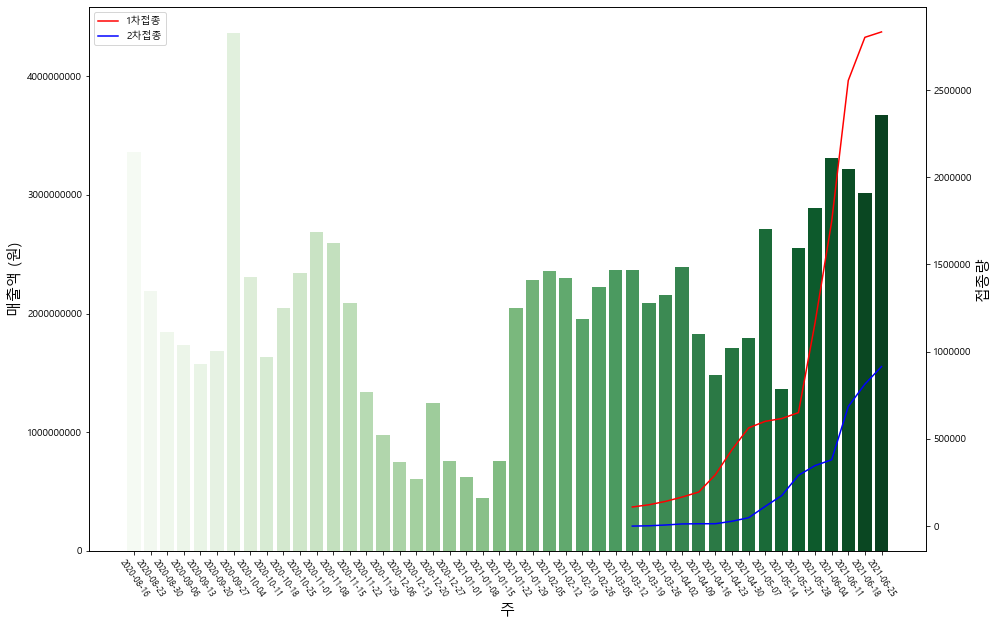

In [47]:
## 1차 2차 백신 누적 접종 현황과 영화관 매출액

x =  seoul_vc['주']
y =  seoul_vc['매출액']
y1 = seoul_vc['1차접종누계']
y2 = seoul_vc['2차접종누계']


fig, ax1 = plt.subplots() # initializes figure and plots

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

ax2 = ax1.twinx()
plt.gcf().set_size_inches(15, 10)

fig1 = sns.barplot(x = x, y = y, ax = ax1, palette = 'Greens') # plots the first set of data, and sets it to ax1. #
fig2 = sns.lineplot(x = x, y = y1, color = 'red', ax = ax2) # plots the second set, and sets to ax2. 
fig3 = sns.lineplot(x = x, y = y2, color = 'blue', ax = ax2)

#plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )

fig1.set_xticklabels(fig1.get_xticklabels(), rotation=-55, fontsize='small')


## 라벨 이름 설정
fig1.set_xlabel("주", fontsize = 15)
fig1.set_ylabel("매출액 (원)", fontsize = 15)
fig2.set_ylabel("접종량", fontsize = 15)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.legend(labels=["1차접종","2차접종"])

plt.show()

<ipython-input-50-ff1cf81ee752>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig2.set_xticklabels(fig1.get_xticklabels(), rotation=-55, fontsize='small')


[Text(0, 0, '2020-08-16'),
 Text(1, 0, '2020-08-23'),
 Text(2, 0, '2020-08-30'),
 Text(3, 0, '2020-09-06'),
 Text(4, 0, '2020-09-13'),
 Text(5, 0, '2020-09-20'),
 Text(6, 0, '2020-09-27'),
 Text(7, 0, '2020-10-04'),
 Text(8, 0, '2020-10-11'),
 Text(9, 0, '2020-10-18'),
 Text(10, 0, '2020-10-25'),
 Text(11, 0, '2020-11-01'),
 Text(12, 0, '2020-11-08'),
 Text(13, 0, '2020-11-15'),
 Text(14, 0, '2020-11-22'),
 Text(15, 0, '2020-11-29'),
 Text(16, 0, '2020-12-06'),
 Text(17, 0, '2020-12-13'),
 Text(18, 0, '2020-12-20'),
 Text(19, 0, '2020-12-27'),
 Text(20, 0, '2021-01-01'),
 Text(21, 0, '2021-01-08'),
 Text(22, 0, '2021-01-15'),
 Text(23, 0, '2021-01-22'),
 Text(24, 0, '2021-01-29'),
 Text(25, 0, '2021-02-05'),
 Text(26, 0, '2021-02-12'),
 Text(27, 0, '2021-02-19'),
 Text(28, 0, '2021-02-26'),
 Text(29, 0, '2021-03-05'),
 Text(30, 0, '2021-03-12'),
 Text(31, 0, '2021-03-19'),
 Text(32, 0, '2021-03-26'),
 Text(33, 0, '2021-04-02'),
 Text(34, 0, '2021-04-09'),
 Text(35, 0, '2021-04-16'),
 T

Text(0.5, 0, '주')

Text(0, 0.5, '접종량')

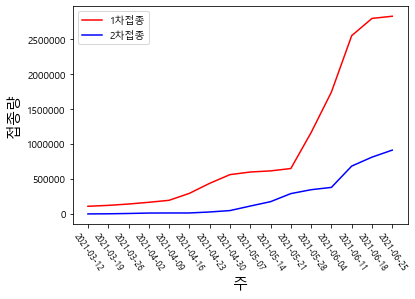

In [50]:
x =  seoul_vc['주']
y =  seoul_vc['매출액']
y1 = seoul_vc['1차접종누계']
y2 = seoul_vc['2차접종누계']

fig2 = sns.lineplot(x = x, y = y1, color = 'red') # plots the second set, and sets to ax2. 
fig3 = sns.lineplot(x = x, y = y2, color = 'blue')

ax = plt.gca()

fig2.set_xticklabels(fig1.get_xticklabels(), rotation=-55, fontsize='small')
ax.get_yaxis().get_major_formatter().set_scientific(False)

## 라벨 이름 설정
fig2.set_xlabel("주", fontsize = 15)
fig2.set_ylabel("접종량", fontsize = 15)

plt.legend(labels=["1차접종","2차접종"])

plt.show()

## 부산 데이터 시각화 - 1차 2차 백신 누적 접종 현황과 영화관 매출액

<ipython-input-51-4ae24e6587bd>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig1.set_xticklabels(fig1.get_xticklabels(), rotation=-55, fontsize='small')


[Text(0, 0, '2020-08-16'),
 Text(1, 0, '2020-08-23'),
 Text(2, 0, '2020-08-30'),
 Text(3, 0, '2020-09-06'),
 Text(4, 0, '2020-09-13'),
 Text(5, 0, '2020-09-20'),
 Text(6, 0, '2020-09-27'),
 Text(7, 0, '2020-10-04'),
 Text(8, 0, '2020-10-11'),
 Text(9, 0, '2020-10-18'),
 Text(10, 0, '2020-10-25'),
 Text(11, 0, '2020-11-01'),
 Text(12, 0, '2020-11-08'),
 Text(13, 0, '2020-11-15'),
 Text(14, 0, '2020-11-22'),
 Text(15, 0, '2020-11-29'),
 Text(16, 0, '2020-12-06'),
 Text(17, 0, '2020-12-13'),
 Text(18, 0, '2020-12-20'),
 Text(19, 0, '2020-12-27'),
 Text(20, 0, '2021-01-01'),
 Text(21, 0, '2021-01-08'),
 Text(22, 0, '2021-01-15'),
 Text(23, 0, '2021-01-22'),
 Text(24, 0, '2021-01-29'),
 Text(25, 0, '2021-02-05'),
 Text(26, 0, '2021-02-12'),
 Text(27, 0, '2021-02-19'),
 Text(28, 0, '2021-02-26'),
 Text(29, 0, '2021-03-05'),
 Text(30, 0, '2021-03-12'),
 Text(31, 0, '2021-03-19'),
 Text(32, 0, '2021-03-26'),
 Text(33, 0, '2021-04-02'),
 Text(34, 0, '2021-04-09'),
 Text(35, 0, '2021-04-16'),
 T

Text(0.5, 0, '주')

Text(0, 0.5, '판매량 (원)')

Text(0, 0.5, '접종량')

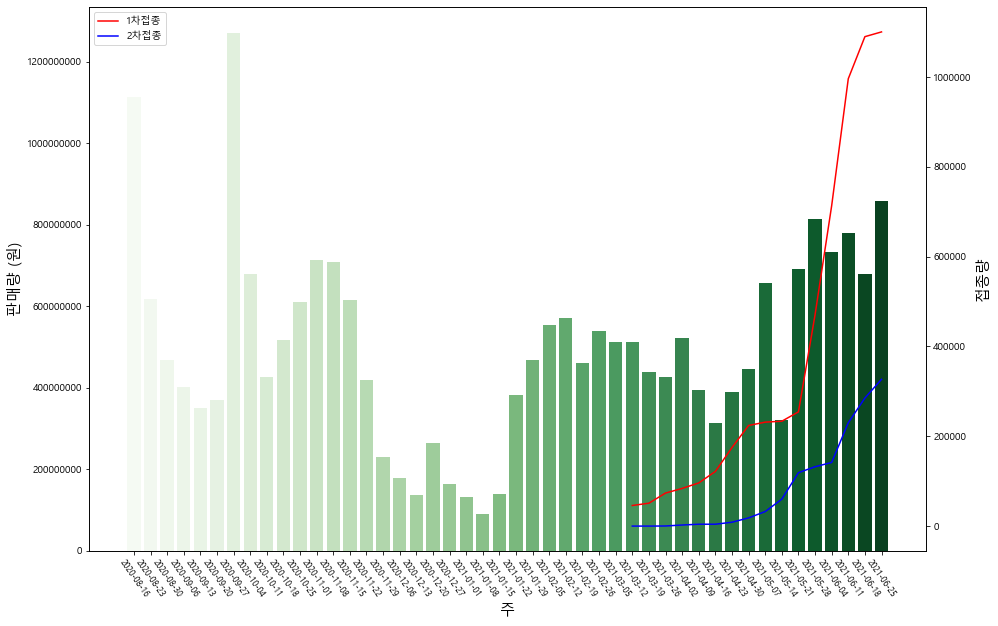

In [51]:
## 1차 2차 백신 누적 접종 현황과 영화관 매출액

x =  busan_vc['주']
y =  busan_vc['매출액']
y1 = busan_vc['1차접종누계']
y2 = busan_vc['2차접종누계']


fig, ax1 = plt.subplots() # initializes figure and plots

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

ax2 = ax1.twinx()
plt.gcf().set_size_inches(15, 10)

fig1 = sns.barplot(x = x, y = y, ax = ax1, palette = 'Greens') # plots the first set of data, and sets it to ax1. #
fig2 = sns.lineplot(x = x, y = y1, color = 'red', ax = ax2) # plots the second set, and sets to ax2. 
fig3 = sns.lineplot(x = x, y = y2, color = 'blue', ax = ax2)

#plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )

fig1.set_xticklabels(fig1.get_xticklabels(), rotation=-55, fontsize='small')


## 라벨 이름 설정
fig1.set_xlabel("주", fontsize = 15)
fig1.set_ylabel("판매량 (원)", fontsize = 15)
fig2.set_ylabel("접종량", fontsize = 15)

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.legend(labels=["1차접종","2차접종"])

plt.show()

<ipython-input-52-73d20f3bd1d4>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig2.set_xticklabels(fig1.get_xticklabels(), rotation=-55, fontsize='small')


[Text(0, 0, '2020-08-16'),
 Text(1, 0, '2020-08-23'),
 Text(2, 0, '2020-08-30'),
 Text(3, 0, '2020-09-06'),
 Text(4, 0, '2020-09-13'),
 Text(5, 0, '2020-09-20'),
 Text(6, 0, '2020-09-27'),
 Text(7, 0, '2020-10-04'),
 Text(8, 0, '2020-10-11'),
 Text(9, 0, '2020-10-18'),
 Text(10, 0, '2020-10-25'),
 Text(11, 0, '2020-11-01'),
 Text(12, 0, '2020-11-08'),
 Text(13, 0, '2020-11-15'),
 Text(14, 0, '2020-11-22'),
 Text(15, 0, '2020-11-29'),
 Text(16, 0, '2020-12-06'),
 Text(17, 0, '2020-12-13'),
 Text(18, 0, '2020-12-20'),
 Text(19, 0, '2020-12-27'),
 Text(20, 0, '2021-01-01'),
 Text(21, 0, '2021-01-08'),
 Text(22, 0, '2021-01-15'),
 Text(23, 0, '2021-01-22'),
 Text(24, 0, '2021-01-29'),
 Text(25, 0, '2021-02-05'),
 Text(26, 0, '2021-02-12'),
 Text(27, 0, '2021-02-19'),
 Text(28, 0, '2021-02-26'),
 Text(29, 0, '2021-03-05'),
 Text(30, 0, '2021-03-12'),
 Text(31, 0, '2021-03-19'),
 Text(32, 0, '2021-03-26'),
 Text(33, 0, '2021-04-02'),
 Text(34, 0, '2021-04-09'),
 Text(35, 0, '2021-04-16'),
 T

Text(0.5, 0, '주')

Text(0, 0.5, '접종량')

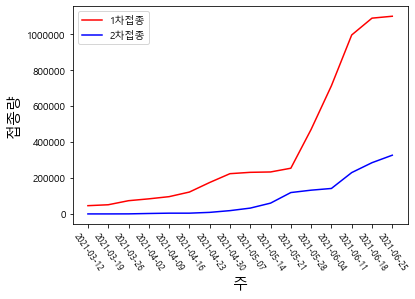

In [52]:
x =  busan_vc['주']
y =  busan_vc['매출액']
y1 = busan_vc['1차접종누계']
y2 = busan_vc['2차접종누계']

fig2 = sns.lineplot(x = x, y = y1, color = 'red') # plots the second set, and sets to ax2. 
fig3 = sns.lineplot(x = x, y = y2, color = 'blue')

ax = plt.gca()

fig2.set_xticklabels(fig1.get_xticklabels(), rotation=-55, fontsize='small')
ax.get_yaxis().get_major_formatter().set_scientific(False)

## 라벨 이름 설정
fig2.set_xlabel("주", fontsize = 15)
fig2.set_ylabel("접종량", fontsize = 15)


plt.legend(labels=["1차접종","2차접종"])

plt.show()

In [ ]:
x =  busan_vc['주']
y =  busan_vc['매출액']
y1 = busan_vc['1차접종누계']
y2 = busan_vc['2차접종누계']


## 서울 vs 부산

<ipython-input-42-d45ffdd06ba7>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig1.set_xticklabels(fig1.get_xticklabels(), rotation=-55, fontsize='small')


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, '')]

Text(0.5, 0, '주')

Text(0, 0.5, '접종량')

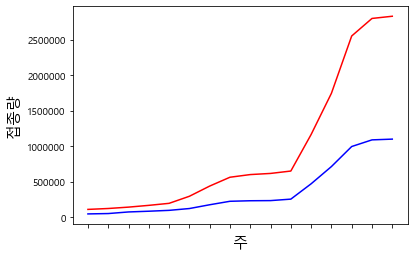

In [42]:
x_s =  seoul_vc['주']
y_s =  seoul_vc['매출액']
y1_s = seoul_vc['1차접종누계']
y2_s = seoul_vc['2차접종누계']


x_b =  busan_vc['주']
y_b =  busan_vc['매출액']
y1_b = busan_vc['1차접종누계']
y2_b = busan_vc['2차접종누계']



fig1 = sns.lineplot(x = x_s, y = y1_s, color = 'red') # plots the second set, and sets to ax2. 
fig2 = sns.lineplot(x = x, y = y1_b, color = 'blue')

ax = plt.gca()

fig1.set_xticklabels(fig1.get_xticklabels(), rotation=-55, fontsize='small')
ax.get_yaxis().get_major_formatter().set_scientific(False)

## 라벨 이름 설정
fig1.set_xlabel("주", fontsize = 15)
fig1.set_ylabel("접종량", fontsize = 15)

plt.show()